In [3]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

load_img = tf.keras.preprocessing.image.load_img
img_to_array = tf.keras.preprocessing.image.img_to_array
Adam = tf.keras.optimizers.Adam
to_categorical = tf.keras.utils.to_categorical

In [4]:
FilePath = "archive/hmnist_28_28_RGB.csv"
dataSet = pd.read_csv(FilePath)

In [5]:
Label = dataSet["label"]
Data = dataSet.drop(columns=["label"]) 

c:\Users\ERIC ECHEMANE\Desktop\Projects\skin cancer\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

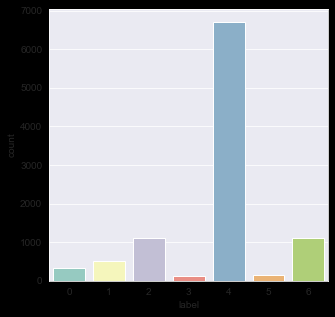

In [6]:
import seaborn as sns

plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(Label)

In [7]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()
Data,Label  = oversample.fit_resample(Data,Label)
Data = np.array(Data).reshape(-1,28,28,3)
print('Shape of Data :', Data.shape)

Shape of Data : (46935, 28, 28, 3)


c:\Users\ERIC ECHEMANE\Desktop\Projects\skin cancer\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

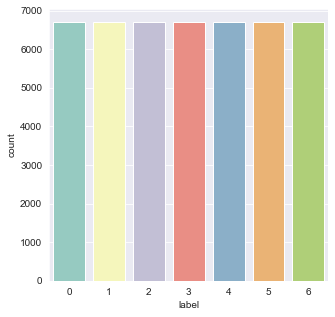

In [8]:
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
sns.countplot(Label)

In [9]:
Label = np.array(Label)
Label

array([2, 2, 2, ..., 6, 6, 6], dtype=int64)

In [10]:
classes = { 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
            1:('bcc' , ' basal cell carcinoma'),
            2:('bkl', 'benign keratosis-like lesions'),
            3: ('df', 'dermatofibroma'),
            4: ('nv', ' melanocytic nevi'),
            5: ('vasc', 'vascular lesions'),
            6: ('mel', 'melanoma')}

In [11]:
X_train , X_test , y_train , y_test = train_test_split(Data , Label , test_size = 0.25 , random_state = 49)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35201, 28, 28, 3)
(11734, 28, 28, 3)
(35201,)
(11734,)


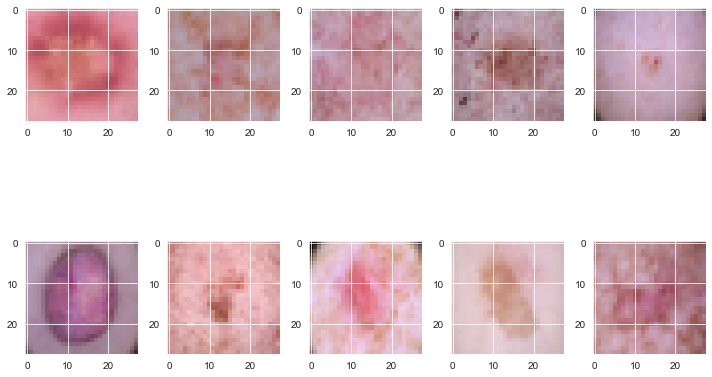

In [13]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [16]:
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)

In [ ]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [17]:
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

datagenerator = ImageDataGenerator(rescale=(1./255)
                             ,rotation_range=10
                             ,zoom_range = 0.1
                             ,width_shift_range=0.1
                             ,height_shift_range=0.1)

testgenerator = ImageDataGenerator(rescale=(1./255))

In [18]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy'
                                            , patience = 2
                                            , verbose=1
                                            ,factor=0.5
                                            , min_lr=0.0001)

In [19]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same',input_shape = (28,28,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(64,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(128,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu', kernel_initializer= 'he_uniform', padding = 'same'))
model.add(Conv2D(256,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation= 'relu',kernel_initializer='he_uniform'))
model.add(Dense(7,activation = 'softmax', kernel_initializer="glorot_uniform" , name = 'classifier'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

In [21]:
model.compile(optimizer= 'adam' , loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train ,
                    y_train ,
                    epochs=25 ,
                    batch_size=128,
                    validation_data=(X_test , y_test) ,
                    callbacks=[learning_rate_reduction])

Epoch 1/25
276/276 [==============================] - 112s 405ms/step - loss: 8.1244 - accuracy: 0.5242 - val_loss: 1.1463 - val_accuracy: 0.5304 - lr: 0.0010
Epoch 2/25
276/276 [==============================] - 105s 380ms/step - loss: 0.6454 - accuracy: 0.7617 - val_loss: 0.5953 - val_accuracy: 0.7699 - lr: 0.0010
Epoch 3/25
276/276 [==============================] - 105s 381ms/step - loss: 0.4011 - accuracy: 0.8562 - val_loss: 0.4125 - val_accuracy: 0.8456 - lr: 0.0010
Epoch 4/25
276/276 [==============================] - 104s 377ms/step - loss: 0.2746 - accuracy: 0.9050 - val_loss: 0.2981 - val_accuracy: 0.8975 - lr: 0.0010
Epoch 5/25
276/276 [==============================] - 103s 372ms/step - loss: 0.1791 - accuracy: 0.9387 - val_loss: 0.1712 - val_accuracy: 0.9435 - lr: 0.0010
Epoch 6/25
276/276 [==============================] - 103s 373ms/step - loss: 0.1418 - accuracy: 0.9509 - val_loss: 0.3033 - val_accuracy: 0.9058 - lr: 0.0010
Epoch 7/25
275/276 [==========================

In [22]:
model.evaluate(X_test, y_test)

367/367 [==============================] - 9s 23ms/step - loss: 327.3203 - accuracy: 0.1417


[327.32025146484375, 0.14172489941120148]

In [ ]:
model.save('final_cnn.h5')

In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
image = keras.preprocessing.image

classes = { 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),
            1: ('bcc' , ' basal cell carcinoma'),
            2: ('bkl', 'benign keratosis-like lesions'),
            3: ('df', 'dermatofibroma'),
            4: ('nv', ' melanocytic nevi'),
            5: ('vasc', 'vascular lesions'),
            6: ('mel', 'melanoma') }

def crop_square(img, size, interpolation=cv2.INTER_AREA):
    h, w = img.shape[:2]
    min_size = np.amin([h,w])

    # Centralize and crop
    crop_img = img[int(h/2-min_size/2):int(h/2+min_size/2), int(w/2-min_size/2):int(w/2+min_size/2)]
    resized = cv2.resize(crop_img, (size, size), interpolation=interpolation)

    return resized


def classify(image_fp):

    image = plt.imread(image_fp)
    image = crop_square(image, 28)
    plt.imshow(image)

    model = keras.models.load_model('final_cnn.h5')
    predicted_value = model.predict(np.array([image]))
    
    out  = f"""
      akiec: {predicted_value[0][0]}
        bcc: {predicted_value[0][1]}
        bkl: {predicted_value[0][2]}
         df: {predicted_value[0][3]}
         nv: {predicted_value[0][4]}
       vasc: {predicted_value[0][5]}
        mel: {predicted_value[0][6]}

     Result: {(predicted_value[0][predicted_value.argmax()] * 100)}% {classes[predicted_value.argmax()]}
    """
    return out

1/1 [==============================] - 0s 123ms/step

      akiec: 1.567196893093037e-11
        bcc: 0.9999973773956299
        bkl: 2.6087818696396425e-06
         df: 6.731354362798925e-10
         nv: 5.066110031481941e-11
       vasc: 8.070194686127241e-12
        mel: 3.2258240635832714e-17

     Result: 99.99973773956299% ('bcc', ' basal cell carcinoma')
    


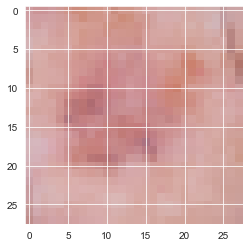

In [27]:
test_prediction = classify('test/bcc/ISIC_0024331.jpg')

print(test_prediction)